# import dataset

In [209]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


In [210]:
import pandas as pd
import numpy as np
df = pd.read_csv('model_data.csv').drop(columns = ['Unnamed: 0'])

df = df[['prev_CW/SA_rate', 'S_create2SA_Create', 'S_Create2Start_Time',
       'SA_Create2Start_Time', 'U_create2now', 'U_approve2now', 'type_d',
       'segmentName_d', 'net_pay', 'target']]

In [214]:
df.shape

(167723, 10)

In [215]:
df.isna().sum()

prev_CW/SA_rate          0
S_create2SA_Create       0
S_Create2Start_Time      0
SA_Create2Start_Time     0
U_create2now             0
U_approve2now           36
type_d                   0
segmentName_d            0
net_pay                  0
target                   0
dtype: int64

In [216]:
df.dropna(inplace = True) # If True, do operation inplace and return None.

In [217]:
df.shape

(167687, 10)

In [193]:
# # define dataset
# X = df.drop(columns = ['target'])
# y = df['target']

In [194]:
# standardlize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['target', 'segmentName_d', 'type_d'], axis=1))
scaled_features = scaler.transform(df.drop(['target', 'segmentName_d', 'type_d'], axis=1))

In [203]:
# define dataset
X = pd.DataFrame(scaled_features, columns = ['prev_CW/SA_rate', 'S_create2SA_Create', 'S_Create2Start_Time', 
                                             'SA_Create2Start_Time', 'U_create2now', 'U_approve2now', 'net_pay'])
X = pd.concat([X, df[['segmentName_d', 'type_d']]], axis = 1) # concat with dummy
y = df['target']

In [208]:
X.isna().sum()

prev_CW/SA_rate         36
S_create2SA_Create      36
S_Create2Start_Time     36
SA_Create2Start_Time    36
U_create2now            36
U_approve2now           36
net_pay                 36
segmentName_d           36
type_d                  36
dtype: int64

# Linear Regression Feature Importance

In [183]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
linearRegression = pd.DataFrame(model.coef_, X.columns,columns=['Coefficient'])
linearRegression = linearRegression.assign(abs = linearRegression['Coefficient'].abs()) # sort by abs
linearRegression.sort_values(by = 'abs', ascending = False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

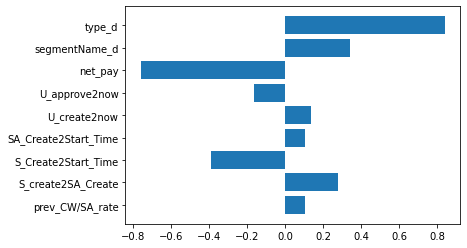

In [184]:
# plot feature importance
pyplot.barh(X.columns, importance)
pyplot.show()

In [185]:
# top 7
linearRegression.sort_values(by = 'abs', ascending = False).head(7).index

Index(['net_pay', 'S_Create2Start_Time', 'type_d', 'S_create2SA_Create',
       'SA_Create2Start_Time', 'segmentName_d', 'prev_CW/SA_rate'],
      dtype='object')

# Logistic Regression Feature Importance

In [186]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]


# summarize feature importance
logitRegression = pd.DataFrame(model.coef_[0], X.columns,columns=['Coefficient'])
logitRegression = logitRegression.assign(abs = logitRegression['Coefficient'].abs()) # sort by abs
logitRegression.sort_values(by = 'abs', ascending = False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

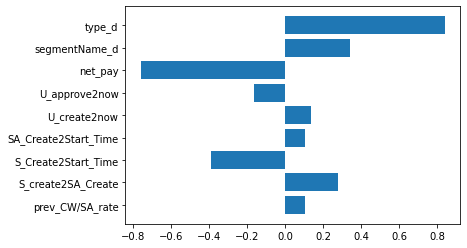

In [187]:
# plot feature importance
pyplot.barh(X.columns, importance)
pyplot.show()

In [188]:
# top 7
logitRegression.sort_values(by = 'abs', ascending = False).head(7).index

Index(['net_pay', 'type_d', 'S_Create2Start_Time', 'segmentName_d',
       'S_create2SA_Create', 'U_approve2now', 'U_create2now'],
      dtype='object')

# Decision Tree Feature Importance

### CART Regression Feature Importance

In [115]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
CARTRegression = pd.DataFrame(importance, X.columns,columns=['Coefficient'])
CARTRegression.sort_values(by = 'Coefficient', ascending = False)

,Coefficient
prev_CW/SA_rate,0.298778
S_create2SA_Create,0.155640
SA_Create2Start_Time,0.151573
S_Create2Start_Time,0.126964
U_approve2now,0.106232
U_create2now,0.093954
net_pay,0.059788
type_d,0.003685
segmentName_d,0.003386


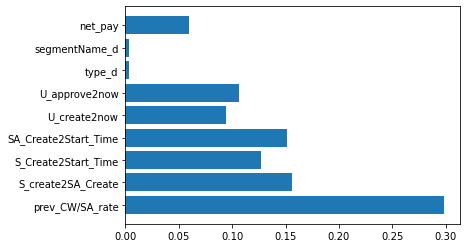

In [116]:
# plot feature importance
# plot feature importance
pyplot.barh(X.columns, importance)
pyplot.show()

In [119]:
# top 7
CARTRegression.sort_values(by = 'Coefficient', ascending = False).head(7).index

Index(['prev_CW/SA_rate', 'S_create2SA_Create', 'SA_Create2Start_Time',
       'S_Create2Start_Time', 'U_approve2now', 'U_create2now', 'net_pay'],
      dtype='object')

### CART Classification Feature Importance

In [218]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').